# Performance Analyser for AudExp

In [15]:
import wave
import matplotlib.pyplot as plt 
import numpy as np
from scipy.io import wavfile

In [2]:
input = wave.open('./enhanced_vocals_harmonic.wav', 'rb')

In [3]:
output = wave.open('./enhanced_vocals_percussive.wav', 'rb')

## Getting Audio Parameters

In [4]:
print('Parameters of input:', input.getparams())
print('Parameters of output:', output.getparams())

Parameters of input: _wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=4537856, comptype='NONE', compname='not compressed')
Parameters of output: _wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=4537856, comptype='NONE', compname='not compressed')


In [5]:
input_sample_freq = input.getframerate()
output_sample_freq = output.getframerate()


In [6]:
input_n_samples = input.getnframes()
output_n_samples = output.getnframes()

In [7]:
input_signal_wave = input.readframes(-1)
output_signal_wave = output.readframes(-1)

In [8]:
input_duration = input_n_samples/input_sample_freq
output_duration = output_n_samples/output_sample_freq

## Creating Numpy Objects

In [9]:
# numpy object from the signal_wave. This will be plotted on the y-axis.

input_signal_array = np.frombuffer(input_signal_wave, dtype=np.int16)
output_signal_array = np.frombuffer(output_signal_wave, dtype=np.int16)

In [10]:
# numpy object from duration. This will be plotted on the x-axis

input_time = np.linspace(0, input_duration, num=input_n_samples)
output_time = np.linspace(0, input_duration, num=output_n_samples)

## Creating the plot

NameError: name 'time' is not defined

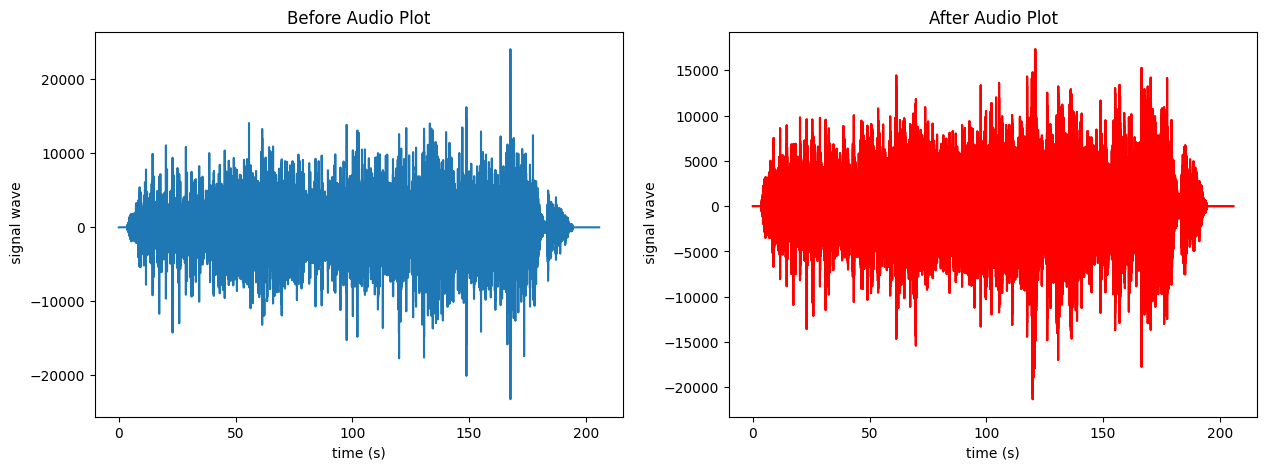

In [11]:
plt.figure(figsize=(15, 5))


# Plot 1
plt.subplot(1, 2, 1)
plt.plot(input_time, input_signal_array)
plt.title('Before Audio Plot')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')


# Plot 2 
plt.subplot(1, 2, 2)
plt.plot(output_time, output_signal_array, color='red')
plt.title('After Audio Plot')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')

# Plot 3 
plt.subplot(1, 2, 2)
plt.plot(output_time, output_signal_array, color='red')
plt.title('After Audio Plot')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')


plt.xlim(0, time) #limiting the x axis to the audio time
plt.show()

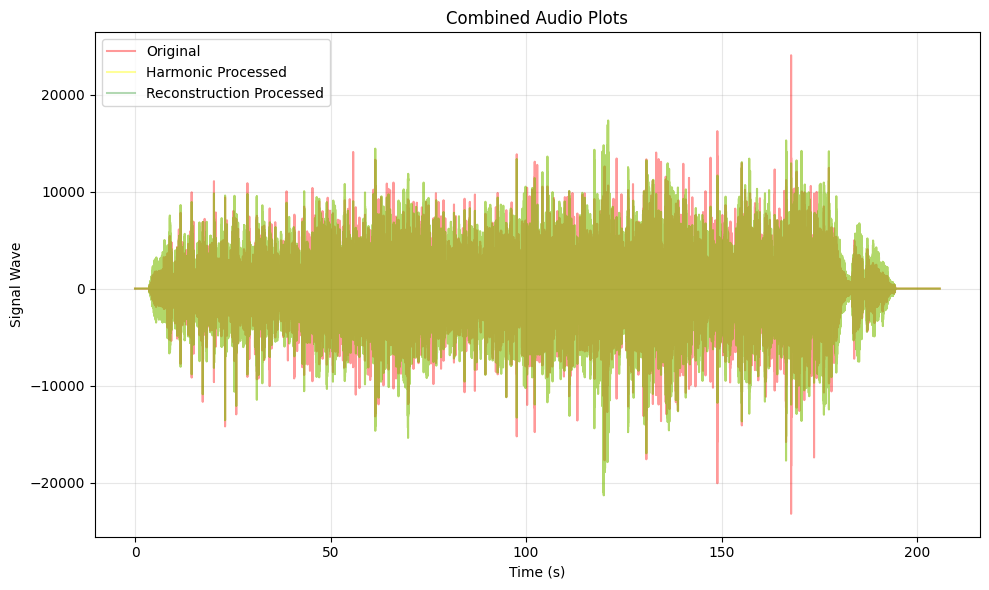

In [14]:
# Assuming you have already defined input_time, input_signal_array, output_time, and output_signal_array

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot 1
plt.plot(input_time, input_signal_array, label='Original', alpha=0.4, color='red')

# Plot 2
plt.plot(output_time, output_signal_array, color='yellow', label='Harmonic Processed', alpha=0.4)

# Plot 3 (same as Plot 2 in your original code)
plt.plot(output_time, output_signal_array, color='green', label='Reconstruction Processed', alpha=0.3)

plt.title('Combined Audio Plots')
plt.ylabel('Signal Wave')
plt.xlabel('Time (s)')
plt.legend()
plt.grid(True, alpha=0.3)  # Also added transparency to the grid

plt.tight_layout()
plt.show()

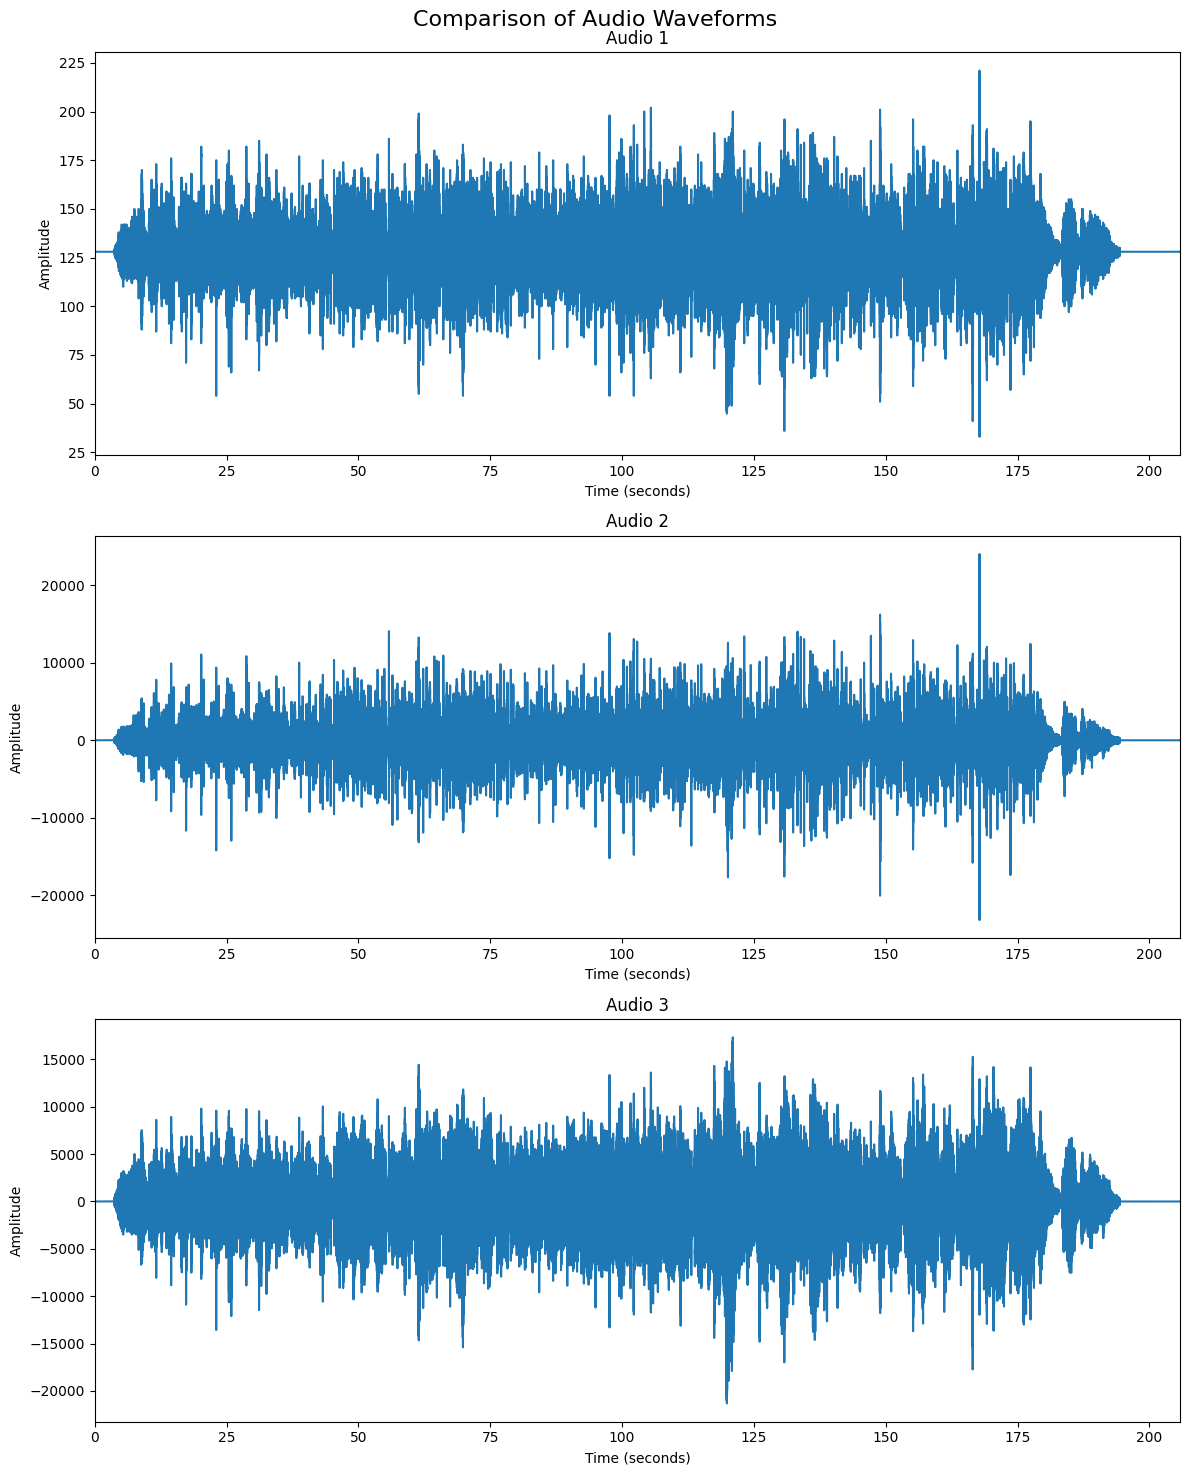

In [16]:
def read_wav(filename):
    sample_rate, data = wavfile.read(filename)
    return sample_rate, data

def plot_waveform(ax, sample_rate, data, title):
    time = np.arange(0, len(data)) / sample_rate
    ax.plot(time, data)
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Amplitude')
    ax.set_title(title)
    ax.set_xlim(0, len(data) / sample_rate)

# List of .wav files to compare
wav_files = ['./Test1.wav', './enhanced_vocals_harmonic.wav', './enhanced_vocals_percussive.wav']

# Create a figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('Comparison of Audio Waveforms', fontsize=16)

# Plot each audio file
for i, wav_file in enumerate(wav_files):
    sample_rate, data = read_wav(wav_file)
    
    # If stereo, use only one channel
    if len(data.shape) > 1:
        data = data[:, 0]
    
    plot_waveform(axs[i], sample_rate, data, f'Audio {i+1}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()